In [12]:
import numpy as np
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
import readligo as rl

In [13]:
strain, time, dq = rl.loaddata("/Volumes/Research/GWNMMAD_data/Test_Data/Injection_from_Ligo/L-L1_LOSC_4_V1-816996352-4096.hdf5")

In [10]:
time

array([8.16996352e+08, 8.16996352e+08, 8.16996352e+08, ...,
       8.17000448e+08, 8.17000448e+08, 8.17000448e+08])

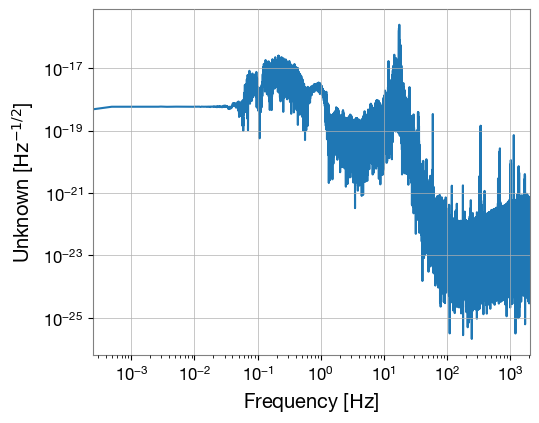

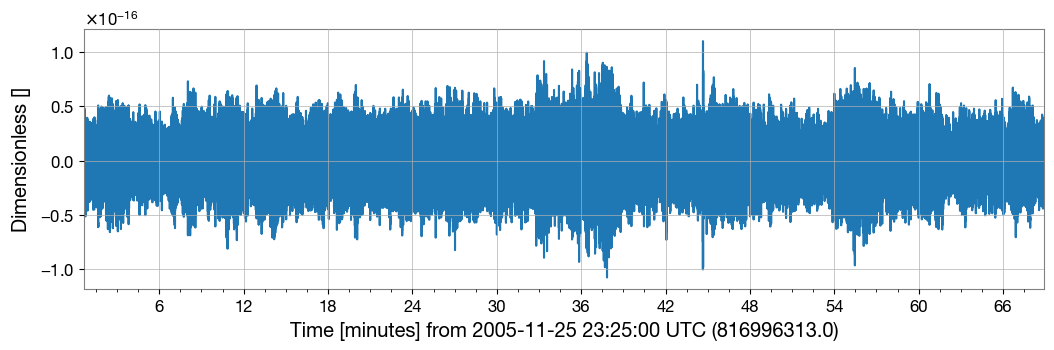

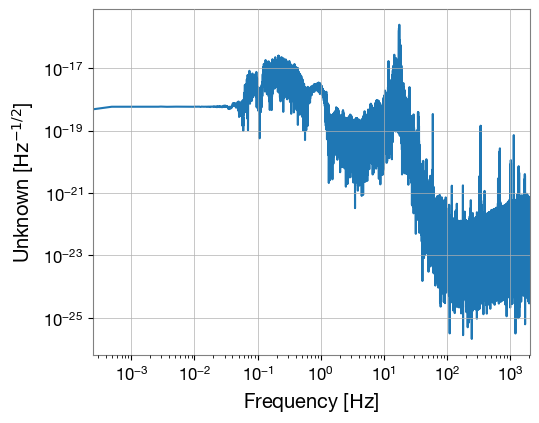

In [21]:
LIGO_injected_data_ini = TimeSeries(strain, dt = 1/4096, t0 = 816996352)
LIGO_injected_data_ini.plot()
LIGO_injected_data_ini.asd().plot()

In [27]:
LIGO_injected_data = LIGO_injected_data_ini.bandpass(30,1000)

In [28]:
LIGO_injected_data = LIGO_injected_data_ini.whiten(highpass = 30)

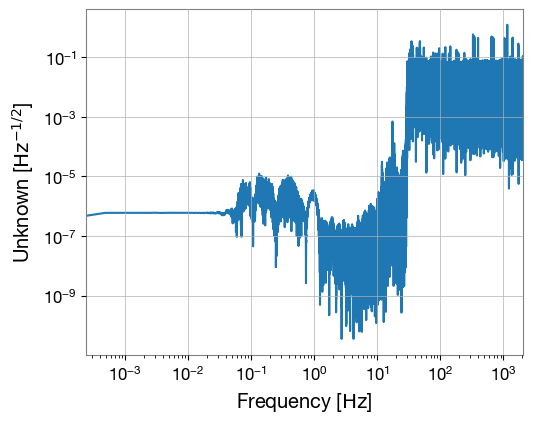

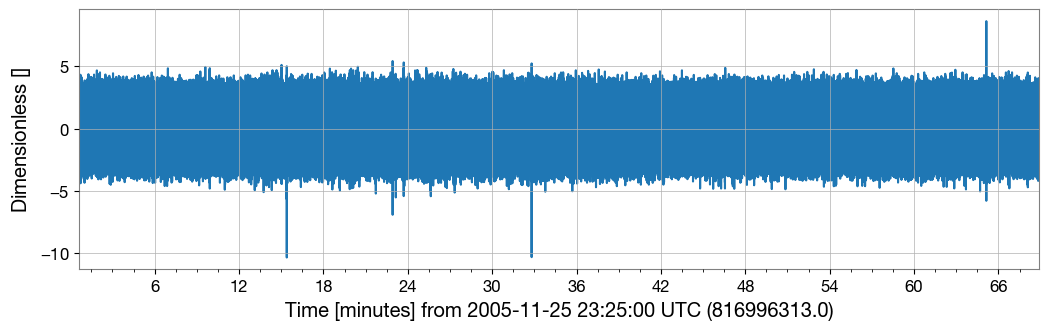

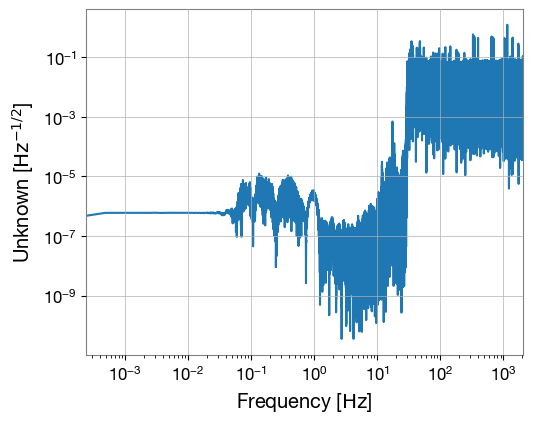

In [29]:
LIGO_injected_data.plot()
LIGO_injected_data.asd().plot()

Then, let's downsample the data to 1024Hz

In [31]:
output_initial_4k_value = LIGO_injected_data.value

array([-0.05706408, -0.04439616, -0.05621017, ...,  0.04883353,
        0.04398151,  0.07591834])

In [38]:
output_initial_4k_value.reshape(-1, 4096)

array([[-0.05706408, -0.04439616, -0.05621017, ...,
        -0.11276041,  1.11353012,  0.29177834],
       [-0.79101236, -1.26620218,  0.47753603, ...,
        -0.18332018, -0.6556733 , -0.85151996],
       [ 0.55574198, -0.10509441, -1.8367201 , ...,
         0.33626629,  0.6334748 ,  0.82094172],
       ...,
       [-0.18549646,  1.38849948,  0.0804979 , ...,
         0.68011362, -1.0484768 ,  0.81241921],
       [-0.52872897,  0.59090923, -0.78566443, ...,
        -0.63978642,  0.74193888,  2.00566196],
       [ 0.10674847,  0.76320721,  0.2306913 , ...,
         0.04883353,  0.04398151,  0.07591834]])

In [52]:
a1 = (np.argwhere(output_initial_4k_value.flatten() > 7)//4096).flatten()
a2 = (np.argwhere(output_initial_4k_value.flatten() < -7)//4096).flatten()

In [54]:
a1

array([3869])

In [55]:
a2

array([ 884, 1929])

In [57]:
a = np.unique(np.concatenate((a1, a2)))

In [71]:
output_initial_4k_value_glitches_removed = np.delete(output_initial_4k_value.reshape(-1, 4096), a, axis = 0)

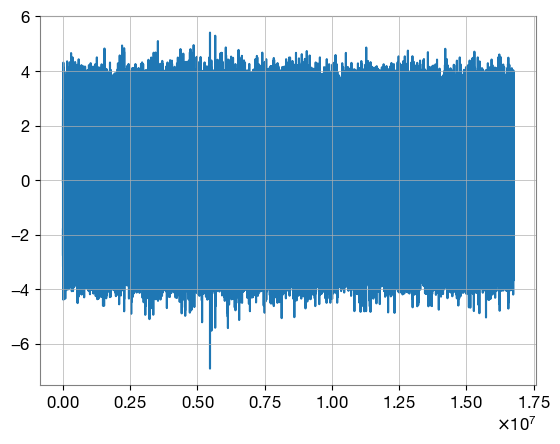

In [72]:
plt.plot(output_initial_4k_value_glitches_removed.flatten())

In [70]:
output_initial_4k_value_glitches_removed = output_initial_4k_value.copy()
empty = np.array([])
while True:
    removal_arguments = np.argwhere(output_initial_4k_value_glitches_removed.flatten() > 4).flatten()[0]
    if removal_arguments == empty:
        break
    output_initial_4k_value_glitches_removed = np.delete(output_initial_4k_value_glitches_removed, removal_arguments//4096, 0)



/var/folders/2v/3ndz_6mx79z7p4z3mfgc3kvc0000gn/T/ipykernel_77573/3875767038.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if removal_arguments == empty:


KeyboardInterrupt: 

In [73]:
output_initial_4k_value_glitches_removed = output_initial_4k_value_glitches_removed.flatten()
average = 0
output_list = np.zeros(len(output_initial_4k_value_glitches_removed)//4)

for i in range(len(output_initial_4k_value_glitches_removed)):
    average = average + output_initial_4k_value_glitches_removed[i]
    if i%4 == 3:
        output_list[i//4] = average / 4
        average = 0
        
assert output_list[-1] != 0

print(output_list.shape)

np.save("/Volumes/Research/GWNMMAD_data/Train_Data/LIGO_injectec_data_downsampled_whitened_bandpassed_glitches_removed.npy", output_list)

(4191232,)
